# 2019 Data analytics Lab @Dept. of Industrial engineering
## Information retrieval and text mining

### Contents
#### 1. Text pre-processing technique
 - 대소문자 변환
 - 숫자, 특수문자, 공백 제거
 - 키워드 추출
 - Tokenize
 - 불용어 제거
 - Stemming
 - Term frequency matrix

#### 2. Text analytics
 - Document similarity
 - Generalized VSM 
 - Social network analysis
 - Assosiation rule mining
 - Sentiment analysis

### Used library
 - SQL Alchemy: DB와 관련된 다양한 작업을 지원하는 라이브러리 (https://www.sqlalchemy.org/)
 - Pandas: 데이터분석용 툴킷, Table 형태로 데이터를 다룰 수 있고 빨라서 널리사용됨 (https://pandas.pydata.org) 
 - Sci-kit learn: Machine learning과 관련된 대부분의 모듈이 구축되어 있음 (http://scikit-learn.org)
 - Matplotlib: Plot을 그릴때 가장 널리 사용되는 라이브러리 (https://matplotlib.org/)
 - NetworkX: 네트워크관련 다양한 작업을 지원하는 패키지 (https://networkx.github.io/)
 - KoNLPy: 한국어 자연어처리를 위한 도구들을 통합해놓은 Wrapper (http://konlpy.org/)
 - re: 정규식 처리를 위한 Python 내부 패키지 (https://docs.python.org/3/library/re.html)
 - nltk: 자연어 처리 툴킷, 가장 범용적으로 사용되는 라이브러리 (https://www.nltk.org)
 - rake-nltk: 키워드 추출 알고리즘 Rake를 지원하는 라이브러리 (https://pypi.org/project/rake-nltk/)
 - spaCy: 자연어 처리 라이브러리, 특히 딥러닝과의 연계에 특화 (https://spacy.io/)
 - mlxtend: Machine learning 라이브러리 (http://rasbt.github.io/mlxtend/)
 
### Data
- 개인과제로 제공된 특허데이터 중에서, 초록 100개를 무작위 추출하여 사용함  
- Pandas를 이용하면 csv, xls 등의 파일을 읽을 수 도 있고, sql로부터 자료를 직접 가져올 수도 있음
- 본 예제에서는 sql에서 직접 가져옴

In [1]:
import pandas as pd
import sqlalchemy
import pymysql
pymysql.install_as_MySQLdb()

conn = sqlalchemy.create_engine('mysql://your id:your pw@address:port/scheme', encoding='utf-8')

query = "SELECT * FROM abstract ORDER BY rand() LIMIT 100"
data = pd.read_sql(sql=query, con=conn)
data.columns = ['app_num','abst']

C:\Users\user\Anaconda3\envs\main\lib\site-packages\pymysql\cursors.py:170: Warning: (1366, "Incorrect string value: '\\xB4\\xEB\\xC7\\xD1\\xB9\\xCE...' for column 'VARIABLE_VALUE' at row 533")
  result = self._query(query)


In [2]:
data.head()

,app_num,abst
0,9777017,The present invention provides tricyclic fused...
1,9545947,A method for implementing a transition from a ...
2,9845261,A method of making a heat treated (HT) substan...
3,9618139,An apparatus for providing thermal and magneti...
4,9837246,A lamella for observation on a transmission el...


#### 1. Text pre-processing technique  
텍스트에서 노이즈를 제거하고, 활용이 가능한 행렬형태로 변형하는 기본적인 방법들을 다룸

##### 1.1 대소문자 변환

In [3]:
sample_str = data.loc[0, 'abst']
print(sample_str)

The present invention provides tricyclic fused thiophene derivatives, as well as their compositions and methods of use, that modulate the activity of Janus kinase (JAK) and are useful in the treatment of diseases related to the activity of JAK including, for example, inflammatory disorders, autoimmune disorders, cancer, and other diseases.


In [4]:
# Python str 객체의 내장 기능을 이용하는 방법
UPPER_STR = sample_str.upper()
print(UPPER_STR)
print()
lower_str = sample_str.lower()
print(lower_str)

THE PRESENT INVENTION PROVIDES TRICYCLIC FUSED THIOPHENE DERIVATIVES, AS WELL AS THEIR COMPOSITIONS AND METHODS OF USE, THAT MODULATE THE ACTIVITY OF JANUS KINASE (JAK) AND ARE USEFUL IN THE TREATMENT OF DISEASES RELATED TO THE ACTIVITY OF JAK INCLUDING, FOR EXAMPLE, INFLAMMATORY DISORDERS, AUTOIMMUNE DISORDERS, CANCER, AND OTHER DISEASES.

the present invention provides tricyclic fused thiophene derivatives, as well as their compositions and methods of use, that modulate the activity of janus kinase (jak) and are useful in the treatment of diseases related to the activity of jak including, for example, inflammatory disorders, autoimmune disorders, cancer, and other diseases.


In [5]:
# Pandas를 이용하여 대량 처리를 하는 방법
data['abst'] = data['abst'].str.lower()
data.head()

,app_num,abst
0,9777017,the present invention provides tricyclic fused...
1,9545947,a method for implementing a transition from a ...
2,9845261,a method of making a heat treated (ht) substan...
3,9618139,an apparatus for providing thermal and magneti...
4,9837246,a lamella for observation on a transmission el...


##### 1.2 숫자, 특수문자, 공백 제거

In [6]:
# Python 내장 re 라이브러리를 이용하는 방법
import re

sample = "What a 따뜻한 welcome for iPhone XR, iPhone XS and Apple Watch Series 4 in Korea this weekend! 고맙습니다! Hope you enjoy! 🎉"
UPPER = re.sub('[^A-Z]', '', sample)
print(UPPER)
lower = re.sub('[^a-z]', '', sample)
print(lower)
number = re.sub('[^0-9]', '', sample)
print(number)
korean = re.sub('[^가-힣]', '', sample)
print(korean)
result = re.sub('[^a-zA-Z0-9가-힣\s]', '', sample)
print(result)

WPXRPXSAWSKH
hatawelcomeforihoneihoneandppleatcheriesinoreathisweekendopeyouenjoy
4
따뜻한고맙습니다
What a 따뜻한 welcome for iPhone XR iPhone XS and Apple Watch Series 4 in Korea this weekend 고맙습니다 Hope you enjoy 


In [7]:
# Pandas를 이용하여 대량 처리를 하는 방법
data['abst'] = data['abst'].str.replace('[^a-zA-Z0-9가-힣\s]', '', regex=True)
data.head()

,app_num,abst
0,9777017,the present invention provides tricyclic fused...
1,9545947,a method for implementing a transition from a ...
2,9845261,a method of making a heat treated ht substanti...
3,9618139,an apparatus for providing thermal and magneti...
4,9837246,a lamella for observation on a transmission el...


##### 1.3 키워드 추출

In [8]:
# rake (Rapid automatic keyword extraction) 알고리즘을 이용한 방법
import nltk
nltk.download('stopwords') # rake_nltk를 사용하기 위해서 필요


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from rake_nltk import Rake
extractor = Rake(language='english', min_length=1, max_length=3)
extractor.extract_keywords_from_text(sample_str)
keywords = extractor.get_ranked_phrases()

print(keywords)

['janus kinase', 'inflammatory disorders', 'autoimmune disorders', 'jak including', 'diseases related', 'jak', 'diseases', 'well', 'useful', 'use', 'treatment', 'modulate', 'methods', 'example', 'compositions', 'cancer', 'activity']


In [10]:
# spaCy를 이용하여 명사구(Noun phrase chunk)만 추출하는 방법
import spacy
extractor = spacy.load('en_core_web_sm')

doc = extractor(sample_str)
keywords = list(doc.noun_chunks)
            
print(keywords)

[The present invention, tricyclic fused thiophene derivatives, their compositions, methods, use, the activity, Janus kinase, JAK, the treatment, diseases, the activity, JAK, example, inflammatory disorders, autoimmune disorders, cancer, other diseases]


In [11]:
# KoNLPy로 한국어 명사구를 추출하는 방법
import konlpy
import nltk

sentence_ko = """후쿠시마 등 8개 현의 수산물 분쟁에서 패소한 일본이 국내외 소비에 미치는 영향을 우려해 한국의 수입 재개를 끈질기게 요청하고, 
            2020년 도쿄 올림픽에서 ‘후쿠시마산 농수산물 적극 활용한다’는 계획을 밝혔다."""
words = konlpy.tag.Twitter().pos(sentence_ko)

parser = nltk.RegexpParser('NP: {<N.*>*<Suffix>?}')
chunks = parser.parse(words)

noun_chunks = []
for subtree in chunks.subtrees():
    if subtree.label()=='NP':
        noun_chunks.append(' '.join((e[0] for e in list(subtree))))
print(noun_chunks)

C:\Users\user\Anaconda3\envs\main\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['후쿠시마 등 8 개 현', '수산물 분쟁', '패소', '일본', '국내외 소비', '영향', '우려', '한국', '수입 재개', '요청', '2020년 도쿄 올림픽', '후쿠시마 산 농 수산물 적극 활용', '계획']


##### 1.4 Tokenize

In [12]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(sample_str)
print(tokens)

['The', 'present', 'invention', 'provides', 'tricyclic', 'fused', 'thiophene', 'derivatives', ',', 'as', 'well', 'as', 'their', 'compositions', 'and', 'methods', 'of', 'use', ',', 'that', 'modulate', 'the', 'activity', 'of', 'Janus', 'kinase', '(', 'JAK', ')', 'and', 'are', 'useful', 'in', 'the', 'treatment', 'of', 'diseases', 'related', 'to', 'the', 'activity', 'of', 'JAK', 'including', ',', 'for', 'example', ',', 'inflammatory', 'disorders', ',', 'autoimmune', 'disorders', ',', 'cancer', ',', 'and', 'other', 'diseases', '.']


##### 1.5 불용어 제거

In [13]:
# stopwords lists
from nltk.corpus import stopwords
print(stopwords.words('english'))

from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
print(ENGLISH_STOP_WORDS)

from spacy.lang.en.stop_words import STOP_WORDS
print(STOP_WORDS)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
stop_words = set(stopwords.words('english'))

tokens = word_tokenize(sample_str)
tokens_without_stopwords = [i for i in tokens if not i in stop_words]
print (tokens_without_stopwords)

['The', 'present', 'invention', 'provides', 'tricyclic', 'fused', 'thiophene', 'derivatives', ',', 'well', 'compositions', 'methods', 'use', ',', 'modulate', 'activity', 'Janus', 'kinase', '(', 'JAK', ')', 'useful', 'treatment', 'diseases', 'related', 'activity', 'JAK', 'including', ',', 'example', ',', 'inflammatory', 'disorders', ',', 'autoimmune', 'disorders', ',', 'cancer', ',', 'diseases', '.']


##### 1.6 Stemming & Lemmatizing

In [15]:
# Stemming (어간화)
from nltk.stem import PorterStemmer

stemmer= PorterStemmer()
stems = [stemmer.stem(token) for token in tokens_without_stopwords]
print(stems)

['the', 'present', 'invent', 'provid', 'tricycl', 'fuse', 'thiophen', 'deriv', ',', 'well', 'composit', 'method', 'use', ',', 'modul', 'activ', 'janu', 'kinas', '(', 'jak', ')', 'use', 'treatment', 'diseas', 'relat', 'activ', 'jak', 'includ', ',', 'exampl', ',', 'inflammatori', 'disord', ',', 'autoimmun', 'disord', ',', 'cancer', ',', 'diseas', '.']


In [16]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer

lematizer = WordNetLemmatizer()
lemmas = [lematizer.lemmatize(token) for token in tokens_without_stopwords]
print(lemmas)

['The', 'present', 'invention', 'provides', 'tricyclic', 'fused', 'thiophene', 'derivative', ',', 'well', 'composition', 'method', 'use', ',', 'modulate', 'activity', 'Janus', 'kinase', '(', 'JAK', ')', 'useful', 'treatment', 'disease', 'related', 'activity', 'JAK', 'including', ',', 'example', ',', 'inflammatory', 'disorder', ',', 'autoimmune', 'disorder', ',', 'cancer', ',', 'disease', '.']


##### 1.7 Term frequency matrix

In [17]:
sample_corpus = data[0:10].abst.values #10개 문서만 사용

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
TFM = vectorizer.fit_transform(sample_corpus)

In [19]:
print(vectorizer.get_feature_names()[0:10])
print(TFM.toarray()[0])

['10', '50', 'according', 'activity', 'adjoins', 'adjusting', 'analytical', 'andor', 'anode', 'apparatus']
[0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0
 0 0]


In [20]:
# bi-gram TF
bi_vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
bi_TFM = bi_vectorizer.fit_transform(sample_corpus)

In [21]:
print(bi_vectorizer.get_feature_names()[0:10])
print(bi_TFM.toarray()[0])

['10 multiple', '10 nm', '50 10', 'according porespace', 'activity jak', 'activity janus', 'adjoins lower', 'adjusting hydrocarbon', 'analytical instruments', 'andor heat']
[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0

In [22]:
vectorizer = CountVectorizer(stop_words='english', vocabulary=set(tokens_without_stopwords))
TFM = vectorizer.fit_transform(sample_corpus)

In [23]:
print(vectorizer.get_feature_names()[0:15])
print(TFM.toarray()[0])

['(', ')', ',', '.', 'JAK', 'Janus', 'The', 'activity', 'autoimmune', 'cancer', 'compositions', 'derivatives', 'diseases', 'disorders', 'example']
[0 0 0 0 0 0 0 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [24]:
# TFM을 TF-IDF로 변경하는 방법 
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()
TFIDF = transformer.fit_transform(TFM)

In [25]:
print(vectorizer.get_feature_names()[0:15])
print(TFIDF.toarray()[0])

['(', ')', ',', '.', 'JAK', 'Janus', 'The', 'activity', 'autoimmune', 'cancer', 'compositions', 'derivatives', 'diseases', 'disorders', 'example']
[0.         0.         0.         0.         0.         0.
 0.         0.36413983 0.18206991 0.18206991 0.18206991 0.18206991
 0.36413983 0.36413983 0.15477606 0.18206991 0.13541076 0.18206991
 0.15477606 0.18206991 0.18206991 0.18206991 0.18206991 0.15477606
 0.18206991 0.18206991 0.15477606 0.18206991 0.18206991 0.15477606
 0.        ]


In [26]:
# corpus에서 바로 TF-IDF 행렬 만드는 방법
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', vocabulary=set(tokens_without_stopwords)) # parameters는 CountVectorizer와 같음
TFIDF = tfidf_vectorizer.fit_transform(sample_corpus)

In [27]:
print(tfidf_vectorizer.get_feature_names()[0:15])
print(TFIDF.toarray()[0])

['(', ')', ',', '.', 'JAK', 'Janus', 'The', 'activity', 'autoimmune', 'cancer', 'compositions', 'derivatives', 'diseases', 'disorders', 'example']
[0.         0.         0.         0.         0.         0.
 0.         0.36413983 0.18206991 0.18206991 0.18206991 0.18206991
 0.36413983 0.36413983 0.15477606 0.18206991 0.13541076 0.18206991
 0.15477606 0.18206991 0.18206991 0.18206991 0.18206991 0.15477606
 0.18206991 0.18206991 0.15477606 0.18206991 0.18206991 0.15477606
 0.        ]


#### 2. Text analytics
##### 2.1 Document similarity

In [28]:
vectorizer = CountVectorizer(stop_words='english')
TFM = vectorizer.fit_transform(sample_corpus)
print(sample_corpus[0:2])
print(TFM.toarray()[0:2])

['the present invention provides tricyclic fused thiophene derivatives as well as their compositions and methods of use that modulate the activity of janus kinase jak and are useful in the treatment of diseases related to the activity of jak including for example inflammatory disorders autoimmune disorders cancer and other diseases'
 'a method for implementing a transition from a functioning steering assistance system to a deactivated steering assistance system when a fault occurs comprising the following steps establishing the fault of the steering assistance system establishing that all highside power switches are functional first case or establishing that all lowside power switches are functional second case and in the first case opening all highside power switches and performing pwmlike control of the lowside power switches or in the second case opening all lowside power switches and performing pwmlike control of the highside power switches']
[[0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1

In [29]:
# 코사인 유사도에 의한 방법
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(TFM)
print(cos_sim)

[[1.         0.         0.05554527 0.         0.03321361 0.01295646
  0.         0.         0.         0.        ]
 [0.         1.         0.01554801 0.01902606 0.01549503 0.03022265
  0.04928329 0.01301062 0.0364088  0.0223154 ]
 [0.05554527 0.01554801 1.         0.00838149 0.03412989 0.02130223
  0.00542765 0.03438918 0.00801953 0.00983053]
 [0.         0.01902606 0.00838149 1.         0.         0.
  0.06973897 0.06312293 0.02944043 0.        ]
 [0.03321361 0.01549503 0.03412989 0.         1.         0.0477667
  0.         0.11138403 0.         0.05143445]
 [0.01295646 0.03022265 0.02130223 0.         0.0477667  1.
  0.01266051 0.01336933 0.         0.        ]
 [0.         0.04928329 0.00542765 0.06973897 0.         0.01266051
  1.         0.02043845 0.         0.08763841]
 [0.         0.01301062 0.03438918 0.06312293 0.11138403 0.01336933
  0.02043845 1.         0.         0.        ]
 [0.         0.0364088  0.00801953 0.02944043 0.         0.
  0.         0.         1.         0.

In [30]:
# 자카드 계수에 의한 방법
from sklearn.metrics import jaccard_similarity_score

jar_sim = [[jaccard_similarity_score(a, b) for b in TFM.toarray()] for a in TFM.toarray()]

for row in jar_sim:
    print(row)

[1.0, 0.8355704697986577, 0.7516778523489933, 0.8355704697986577, 0.7953020134228188, 0.7986577181208053, 0.7449664429530202, 0.8288590604026845, 0.8590604026845637, 0.785234899328859]
[0.8355704697986577, 1.0, 0.7416107382550335, 0.8422818791946308, 0.7885906040268457, 0.8087248322147651, 0.7583892617449665, 0.8355704697986577, 0.8657718120805369, 0.7953020134228188]
[0.7516778523489933, 0.7416107382550335, 1.0, 0.738255033557047, 0.6912751677852349, 0.6946308724832215, 0.6476510067114094, 0.7348993288590604, 0.761744966442953, 0.6946308724832215]
[0.8355704697986577, 0.8422818791946308, 0.738255033557047, 1.0, 0.785234899328859, 0.7953020134228188, 0.7583892617449665, 0.8389261744966443, 0.8657718120805369, 0.7885906040268457]
[0.7953020134228188, 0.7885906040268457, 0.6912751677852349, 0.785234899328859, 1.0, 0.7449664429530202, 0.6946308724832215, 0.785234899328859, 0.8087248322147651, 0.7449664429530202]
[0.7986577181208053, 0.8087248322147651, 0.6946308724832215, 0.79530201342281

##### 2.2 Generalized VSM

In [31]:
# G-VSM based Document correlation
doc_corr = TFM*TFM.T
print(doc_corr.toarray())

[[ 37   0   5   0   2   1   0   0   0   0]
 [  0 170   3   2   2   5   8   2   4   4]
 [  5   3 219   1   5   4   1   6   1   2]
 [  0   2   1  65   0   0   7   6   2   0]
 [  2   2   5   0  98   6   0  13   0   7]
 [  1   5   4   0   6 161   2   2   0   0]
 [  0   8   1   7   0   2 155   3   0  15]
 [  0   2   6   6  13   2   3 139   0   0]
 [  0   4   1   2   0   0   0   0  71   6]
 [  0   4   2   0   7   0  15   0   6 189]]


In [32]:
# drawing
import networkx as nx
import matplotlib.pyplot as plt

G_d = nx.from_scipy_sparse_matrix(doc_corr)
plt.figure(figsize=(5,5)) 
nx.draw_networkx(G_d)
plt.show()

<Figure size 500x500 with 1 Axes>

In [33]:
# G-VSM based Term correlation
term_corr = TFM.T*TFM
print(term_corr.toarray())

[[4 2 0 ... 0 0 0]
 [2 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


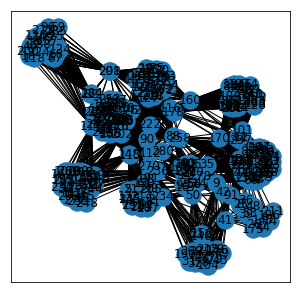

In [34]:
G_t = nx.from_scipy_sparse_matrix(term_corr)
plt.figure(figsize=(5,5)) 
nx.draw_networkx(G_t)
plt.show()

##### 2.3 Social network analysis

In [35]:
# Dijkstra’s algorithm (shortest path)
print(nx.dijkstra_path(G_d, 2, 1))

[2, 1]


In [36]:
# Centralities
print(nx.degree_centrality(G_d))
print(nx.eigenvector_centrality(G_d))

{0: 0.5555555555555556, 1: 1.1111111111111112, 2: 1.222222222222222, 3: 0.7777777777777777, 4: 0.8888888888888888, 5: 0.8888888888888888, 6: 0.8888888888888888, 7: 0.8888888888888888, 8: 0.6666666666666666, 9: 0.7777777777777777}
{0: 0.1714230414282804, 1: 0.4043104121017196, 2: 0.42815911579362914, 3: 0.27811653216589294, 4: 0.31245986982429697, 5: 0.32014266853938006, 6: 0.32970120934138136, 7: 0.33498561699957, 8: 0.22383028432745677, 9: 0.27447668742983855}


In [37]:
# Communities
from networkx.algorithms import community

communities_generator = community.girvan_newman(G_d)
top_level_communities = next(communities_generator)
print(top_level_communities)

second_level_communities = next(communities_generator)
print(second_level_communities)

third_level_communities = next(communities_generator)
print(third_level_communities)

({0}, {1, 2, 3, 4, 5, 6, 7, 8, 9})
({0}, {1, 2, 3, 4, 5, 6, 7, 9}, {8})
({0}, {1, 2, 3, 4, 5, 6, 7}, {8}, {9})


In [38]:
# Link prediction
aai = nx.adamic_adar_index(G_d)

for u, v, p in aai:
    print('(%d, %d) -> %.8f' % (u, v, p))

(0, 1) -> 1.37882909
(0, 3) -> 0.41703239
(0, 6) -> 0.89793074
(0, 7) -> 1.37882909
(0, 8) -> 0.41703239
(0, 9) -> 0.89793074
(3, 9) -> 1.89033585
(3, 4) -> 1.33222522
(3, 5) -> 1.81312357
(4, 8) -> 1.36522522
(4, 6) -> 2.32702191
(5, 8) -> 0.85132687
(5, 9) -> 1.81312357
(6, 8) -> 1.87912356
(7, 8) -> 1.36522522
(7, 9) -> 1.81312357


##### 2.4 Assosiation rule mining

In [39]:
# Bucket 형태로 데이터 변환
itemset = [[[vectorizer.get_feature_names()[idx]]*num for idx, num in enumerate(doc) if num != 0] for doc in TFM.toarray()]
itemset = [sum(item, []) for item in itemset]
print(itemset[0])

['activity', 'activity', 'autoimmune', 'cancer', 'compositions', 'derivatives', 'diseases', 'diseases', 'disorders', 'disorders', 'example', 'fused', 'including', 'inflammatory', 'invention', 'jak', 'jak', 'janus', 'kinase', 'methods', 'modulate', 'present', 'provides', 'related', 'thiophene', 'treatment', 'tricyclic', 'use', 'useful']


In [40]:
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import apriori, association_rules
 
encoder = TransactionEncoder()
oht_ary = encoder.fit_transform(itemset)
df = pd.DataFrame(oht_ary, columns=encoder.columns_)       
 
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
print (frequent_itemsets)
 
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
print (rules)

   support     itemsets
0      0.3  (apparatus)
1      0.3   (includes)
2      0.3  (including)
3      0.4     (method)
4      0.3    (opening)
5      0.3     (second)
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []


##### 2.5 Sentiment analysis

In [41]:
# VADER in NLTK (Valence Aware Dictionary and sEntiment Reasoner)
import nltk
nltk.download('vader_lexicon') # VADER는 사전기반의 감성분석 방법이라, 사전 다운로드가 필요함

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [42]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

summary = {"positive":0,"neutral":0,"negative":0}
for doc in sample_corpus: 
    print(analyzer.polarity_scores(doc))

{'neg': 0.078, 'neu': 0.833, 'pos': 0.089, 'compound': -0.1027}
{'neg': 0.059, 'neu': 0.941, 'pos': 0.0, 'compound': -0.6597}
{'neg': 0.044, 'neu': 0.926, 'pos': 0.03, 'compound': -0.2732}
{'neg': 0.0, 'neu': 0.961, 'pos': 0.039, 'compound': 0.2732}
{'neg': 0.053, 'neu': 0.904, 'pos': 0.044, 'compound': 0.25}
{'neg': 0.0, 'neu': 0.924, 'pos': 0.076, 'compound': 0.8074}
{'neg': 0.015, 'neu': 0.948, 'pos': 0.037, 'compound': 0.4939}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.966, 'pos': 0.034, 'compound': 0.4767}
